In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/heart_desease_prediction.csv')

# Display basic information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Patient ID                                      412 non-null    int64  
 1   Age                                             412 non-null    int64  
 2   Sex                                             412 non-null    object 
 3   Cholesterol+R1D1:S1D1:U1                        412 non-null    int64  
 4   High Blood Pressure                             412 non-null    int64  
 5   Low Blood Pressure                              412 non-null    int64  
 6   Heart Rate                                      412 non-null    int64  
 7   Diabetes                                        412 non-null    int64  
 8   Family History                                  412 non-null    int64  
 9   Smoking                                    

In [110]:
# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Patient ID  Age   Sex  Cholesterol+R1D1:S1D1:U1  High Blood Pressure  \
0           1   63  Male                       154                  141   
1           2   42  Male                       360                  104   
2           3   67  Male                       347                  150   
3           4   47  Male                       229                  110   
4           5   21  Male                       213                  113   

   Low Blood Pressure  Heart Rate  Diabetes  Family History  Smoking  ...  \
0                  91         102         1               0        1  ...   
1                  96          44         1               0        1  ...   
2                  71          65         1               0        1  ...   
3                  72          65         1               0        1  ...   
4                  82          97         1               0        1  ...   

   Stress Level  Sedentary Hours Per Day        BMI Triglycerides  \
0             1  

In [111]:
from sklearn.model_selection import train_test_split

X = df.drop('Heart Attack Risk', axis=1)  # Features
y = df['Heart Attack Risk']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Choose and Train a Model:
1.Logistic Regression
2.Random Forest
3.Support Vector Machines (SVM)
4.Gradient Boosting (e.g., XGBoost, LightGBM)
5.Naive Bayes
6.K-Nearest Neighbors (KNN)
7.Decision Tree
8.Gaussian Naive Bayes

1.Logistic Regression


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/heart_desease_prediction.csv')

# Assuming the target variable is 'Heart Attack Risk'
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Encode categorical variables
label_encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
classifier = LogisticRegression(random_state=42)

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Perform GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions using the best model
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 0.001}
Accuracy: 0.7590361445783133
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        63
           1       0.00      0.00      0.00        20

    accuracy                           0.76        83
   macro avg       0.38      0.50      0.43        83
weighted avg       0.58      0.76      0.66        83



2.Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7349397590361446
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        63
           1       0.00      0.00      0.00        20

    accuracy                           0.73        83
   macro avg       0.38      0.48      0.42        83
weighted avg       0.57      0.73      0.64        83



3.Support Vector Machines (SVM)

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is your DataFrame
# If your categorical columns are 'Sex' and 'Diet', replace them with your actual column names
categorical_columns = ['Sex', 'Diet']

# Use get_dummies to apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Exclude 'Patient ID' and 'Heart Attack Risk' columns
X = df_encoded.drop(['Patient ID', 'Heart Attack Risk'], axis=1)
y = df_encoded['Heart Attack Risk']

# Convert non-numeric columns to numeric using Label Encoding
label_encoder = LabelEncoder()
X = X.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report with zero_division parameter
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7590
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        63
           1       1.00      0.00      0.00        20

    accuracy                           0.76        83
   macro avg       0.88      0.50      0.43        83
weighted avg       0.82      0.76      0.66        83



4.Gradient Boosting (e.g., XGBoost, LightGBM)

In [115]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Fit the model
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.7108433734939759
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        63
           1       0.00      0.00      0.00        20

    accuracy                           0.71        83
   macro avg       0.37      0.47      0.42        83
weighted avg       0.57      0.71      0.63        83



5.Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Create a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes_model.predict(X_test_scaled)

# Evaluate accuracy and print classification report
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)
print(classification_report(y_test, y_pred_nb, zero_division=1))


Accuracy: 0.6385542168674698
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        63
           1       0.22      0.20      0.21        20

    accuracy                           0.64        83
   macro avg       0.49      0.49      0.49        83
weighted avg       0.63      0.64      0.63        83



6.K-Nearest Neighbors (KNN)

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# If your categorical columns are 'Sex' and 'Diet', replace them with your actual column names
categorical_columns = ['Sex', 'Diet']

# Use get_dummies to apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Exclude 'Patient ID' and 'Heart Attack Risk' columns
X = df_encoded.drop(['Patient ID', 'Heart Attack Risk'], axis=1)
y = df_encoded['Heart Attack Risk']

# Convert non-numeric columns to numeric using Label Encoding
label_encoder = LabelEncoder()
X = X.apply(lambda col: label_encoder.fit_transform(col.astype(str)), axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate accuracy and print classification report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))


Accuracy: 0.7228915662650602
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        63
           1       0.33      0.15      0.21        20

    accuracy                           0.72        83
   macro avg       0.55      0.53      0.52        83
weighted avg       0.66      0.72      0.68        83



7.Decision Tree

In [118]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# If your categorical columns are 'Sex' and 'Diet', replace them with your actual column names
categorical_columns = ['Sex', 'Diet']

# Convert non-numeric columns to numeric using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Exclude 'Patient ID' and 'Heart Attack Risk' columns
X = df.drop(['Patient ID', 'Heart Attack Risk'], axis=1)
y = label_encoder.fit_transform(df['Heart Attack Risk'].astype(str))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate accuracy and print classification report
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.6506024096385542
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        63
           1       0.36      0.60      0.45        20

    accuracy                           0.65        83
   macro avg       0.60      0.63      0.60        83
weighted avg       0.73      0.65      0.67        83



 8.Gaussian Naive Bayes

In [119]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# If your categorical columns are 'Sex' and 'Diet', replace them with your actual column names
categorical_columns = ['Sex', 'Diet']

# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Exclude 'Patient ID' and 'Heart Attack Risk' columns
X = df.drop(['Patient ID', 'Heart Attack Risk'], axis=1)
y = label_encoder.fit_transform(df['Heart Attack Risk'].astype(str))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb_model.predict(X_test)

# Evaluate accuracy and print classification report
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy:", accuracy_gnb)
print(classification_report(y_test, y_pred_gnb))


Accuracy: 0.6746987951807228
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        63
           1       0.23      0.15      0.18        20

    accuracy                           0.67        83
   macro avg       0.49      0.50      0.49        83
weighted avg       0.63      0.67      0.65        83



Comparing all the models

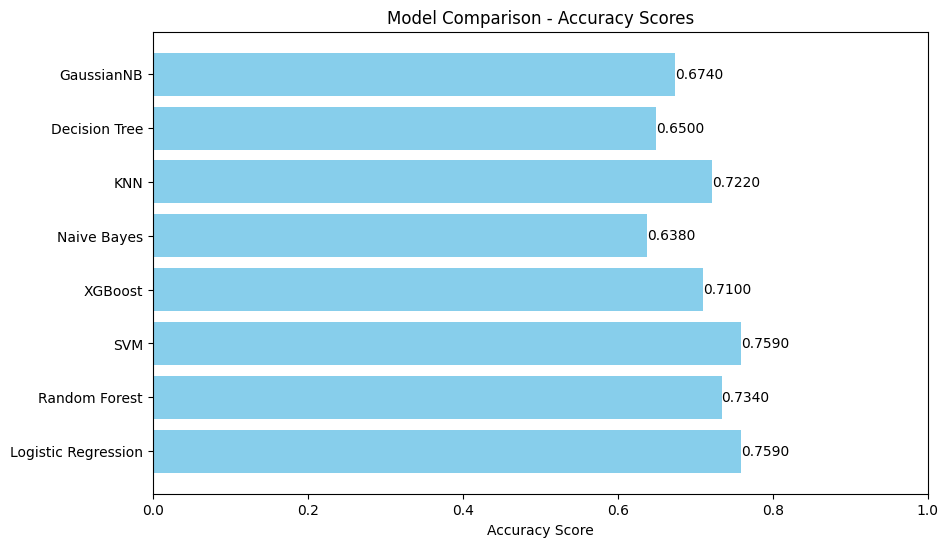

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these variables with the accuracy scores you obtained for each model
accuracy_scores = [0.759, 0.734, 0.759, 0.71, 0.638, 0.722, 0.65, 0.674]
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'Naive Bayes', 'KNN', 'Decision Tree', 'GaussianNB']

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Scores')
plt.xlim(0, 1)  # Set x-axis limits to represent accuracy range (0 to 1)

# Displaying the accuracy scores on the bars
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{accuracy:.4f}', va='center')

plt.show()
